In [95]:
#scrapping asfamas site for the pdfs
import requests
import numpy as np
def download_pdf(url, destination_path):
    response = requests.get(url)
  
    with open(destination_path, 'wb') as file:
        file.write(response.content)

months =["janeiro","fevereiro","marco","abril","junho","julho","agosto","setembro","outubro","novembro","dezembro"]
years =["18","19","20","21","22"]

types =["indiceloucassanitarias","indicemetaissanitarios"]
base_url ="http://www.asfamas.org.br/datafiles/uploads/"
for month in months:
    for year in years:
        for type in types:
            suffix =type+"-"+month+'-'+year+".pdf"
        
            pdf_url =base_url+suffix
            pdf_destination_path = suffix
            download_pdf(pdf_url, "PDFS/"+pdf_destination_path)

In [25]:
import PyPDF2
import re
from datetime import datetime
import pandas as pd
def extract_text(text,pdf_path):
    date = pdf_path.split("-")[1:]
    date[1]=date[1][0:2]
    date[0]=date[0][0:3]
     
    # Obtém o mês e o ano
    month = date[0].lower()
    year = int(date[1]) + 2000  # Adiciona 2000 para obter o ano completo
    
    # Mapeia o mês para um número usando um dicionário
    month_dict = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6,
                  'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}
    
    # Obtém o número do mês a partir do dicionário
    month_number = month_dict.get(month)
    
    # Formata a data no formato desejado (YYYY-MM)
    to_return= pd.to_datetime(f"{year}-{month_number:02d}-01")


    # PDFS/indicemetaissanitarios-janeiro-22.pdf
    start_word = "Acumulado"
    end_word = "FAT"

    start_index = text.find(start_word)
    if start_index == -1:
        return ""

    end_index = text.find(end_word, start_index + len(start_word))
    if end_index == -1:
        return ""

    extracted_text = text[start_index + len(start_word):end_index].strip()
    extracted_text = extracted_text.split(" ")
   
    FAT_mi= extracted_text[0].replace(",",".")
    if FAT_mi[0]=="(":
        FAT_mi= float("-"+ FAT_mi[1:-2])
    else:
        FAT_mi= float( FAT_mi[0:-1])

    FAT_me= extracted_text[3].split('\n', 1)[1].replace(",",".")
    if FAT_me[0]=="(":
        FAT_me= float("-"+ FAT_me[1:-2])
    else:
        FAT_me= float( FAT_me[0:-1])


    
    return to_return,FAT_mi,FAT_me
def extract_text_from_pdf(pdf_paths):
    
    data=[]
    for pdf_path in pdf_paths:
      
        with open(pdf_path, 'rb') as file:
            try:
                reader = PyPDF2.PdfReader(file)
                num_pages = len(reader.pages)
                text = ''
                for page_number in range(num_pages):
                    page = reader.pages[page_number]
                    text += page.extract_text()
                data.append(extract_text(text,pdf_path))
            except:
                pass
      
    return data


months =["janeiro","fevereiro","marco","abril","junho","julho","agosto","setembro","outubro","novembro","dezembro"]
years =["18","19","20","21","22"]


types =["indiceloucassanitarias","indicemetaissanitarios"]
pdf_lists_metais=[]
pdf_lists_loucas=[]
for month in months:
    for year in years:
        for type in types:
            if type =="indiceloucassanitarias":
                pdf_lists_loucas.append("PDFS/"+type+"-"+month+'-'+year+".pdf")
            else:
                pdf_lists_metais.append("PDFS/"+type+"-"+month+'-'+year+".pdf")

metais_indicators= extract_text_from_pdf(pdf_lists_metais)
loucas_indicators= extract_text_from_pdf(pdf_lists_loucas)

2019-01-01 00:00:00
2020-01-01 00:00:00
2021-01-01 00:00:00
2022-01-01 00:00:00
2019-02-01 00:00:00
2020-02-01 00:00:00
2021-02-01 00:00:00
2022-02-01 00:00:00
2019-03-01 00:00:00
2020-03-01 00:00:00
2021-03-01 00:00:00
2022-03-01 00:00:00
2019-04-01 00:00:00
2020-04-01 00:00:00
2021-04-01 00:00:00
2022-04-01 00:00:00
2018-06-01 00:00:00
2019-06-01 00:00:00
2020-06-01 00:00:00
2021-06-01 00:00:00
2022-06-01 00:00:00
2018-07-01 00:00:00
2019-07-01 00:00:00
2020-07-01 00:00:00
2021-07-01 00:00:00
2022-07-01 00:00:00
2018-08-01 00:00:00
2019-08-01 00:00:00
2020-08-01 00:00:00
2021-08-01 00:00:00
2022-08-01 00:00:00
2018-09-01 00:00:00
2019-09-01 00:00:00
2020-09-01 00:00:00
2021-09-01 00:00:00
2018-10-01 00:00:00
2019-10-01 00:00:00
2020-10-01 00:00:00
2021-10-01 00:00:00
2022-10-01 00:00:00
2018-11-01 00:00:00
2019-11-01 00:00:00
2020-11-01 00:00:00
2021-11-01 00:00:00
2022-11-01 00:00:00
2018-12-01 00:00:00
2019-12-01 00:00:00
2020-12-01 00:00:00
2021-12-01 00:00:00
2022-12-01 00:00:00


In [612]:
import pandas as pd
df_metais = df = pd.DataFrame(metais_indicators, columns=["MÊS", "MI", "ME"])
df_loucas = df = pd.DataFrame(loucas_indicators, columns=["MÊS", "MI", "ME"])

def trimester_to_month(df,name):
    new_rows = []
    for index, row in df.iterrows():
        quarter = row['MÊS']
        value = row[name]
       
        # Extract the quarter and year
        quarter_num = int(quarter[0])
        year = int(quarter.split()[-1])
        
        # Calculate the starting month based on the quarter
        start_month = (quarter_num - 1) * 3 + 1
        
        # Generate new rows for each month in the quarter
        for month in range(start_month, start_month + 3):
            date = pd.to_datetime(f'{month}/{year}', format='%m/%Y')
            new_rows.append([date, value/3])

    # Create a new dataframe from the new_rows list
    new_df = pd.DataFrame(new_rows, columns=['MÊS', name])
    return new_df

def read_drop_rename_lookup(file_path, sheet, drop, rename=None, lookup=None):
    df = pd.read_excel(file_path, sheet_name=sheet)

    if rename != None:

        df = df.rename(columns=rename)
    if lookup != None:

        df = df[df[lookup[0]] == lookup[1]]
    for i in drop:
        df = df.drop(i, axis=1)
    return df


df_selic = read_drop_rename_lookup('Indicadores.xlsx', 'SELIC', ['INDICADOR'])

df_incc = read_drop_rename_lookup('indicadores.xlsx', 'INCC e IPCA', ['INDICADOR', '(ACUMULADO 12 MESES)'], {
                                  '(VAR. MENSAL)': 'INCC'}, ['INDICADOR', 'INCC'])
df_ipca = read_drop_rename_lookup('indicadores.xlsx', 'INCC e IPCA', ['INDICADOR', '(ACUMULADO 12 MESES)'], {
                                  '(VAR. MENSAL)': 'IPCA'}, ['INDICADOR', 'IPCA'])

df_pmc_const = read_drop_rename_lookup('Indicadores.xlsx', 'PMC - FONTE', ['INDICADOR'], {
    'ÍNDICE': 'pmc_construcao'}, ['INDICADOR', "PMC DESSAZONALIZADO - CONSTRUÇÃO"])

df_pmc_vare = read_drop_rename_lookup('Indicadores.xlsx', 'PMC - FONTE', ['INDICADOR'], {
    'ÍNDICE': 'pmc_varejo'}, ['INDICADOR', "PMC DESSAZONALIZADO - VAREJO AMPLIADO"])

df_abramat_bas = read_drop_rename_lookup("Indicadores.xlsx", "ABRAMAT", ["INDICADOR"], {
                                         'VAR VS A.A.': 'abramat_basico'}, ['INDICADOR', "ABRAMAT - BÁSICOS"])
df_abramat_acab = read_drop_rename_lookup("Indicadores.xlsx", "ABRAMAT", ["INDICADOR"], {
                                          'VAR VS A.A.': 'abramat_acabados'}, ['INDICADOR', "ABRAMAT - ACABADOS"])

df_confianca_const = read_drop_rename_lookup("Indicadores.xlsx", 'ÍNDICES DE CONFIANÇA', ['INDICADOR'], {
                                             'ÍNDICE': 'confianca_construcao'}, ['INDICADOR', "ÍNDICE DE CONFIANÇA DA CONSTRUÇÃO (AJUSTE SAZONAL)"])
df_confianca_come = read_drop_rename_lookup("Indicadores.xlsx", 'ÍNDICES DE CONFIANÇA', ['INDICADOR'], {
                                            'ÍNDICE': 'confianca_comercio'}, ['INDICADOR', "ÍNDICE DE CONFIANÇA DO COMÉRCIO (AJUSTE SAZONAL)"])
df_confianca_con = read_drop_rename_lookup("Indicadores.xlsx", 'ÍNDICES DE CONFIANÇA', ['INDICADOR'], {
                                           'ÍNDICE': 'confianca_consumdior'}, ['INDICADOR', "ÍNDICE DE CONFIANÇA DO CONSUMIDOR (AJUSTE SAZONAL)"])

df_pib_const =read_drop_rename_lookup("Indicadores.xlsx",'PIB C. CIVIL E IND - TRIMESTRAL',["INDICADOR"],{'% VAR. A.A.':'pib_construcao','TRI':'MÊS'},['INDICADOR',"PIB CONSTRUÇÃO CIVIL"])
df_pib_const =trimester_to_month(df_pib_const,'pib_construcao')
df_pib_ind =read_drop_rename_lookup("Indicadores.xlsx",'PIB C. CIVIL E IND - TRIMESTRAL',["INDICADOR"],{'% VAR. A.A.':'pib_industria','TRI':'MÊS'},['INDICADOR',"PIB INDÚSTRIA"])
df_pib_ind =trimester_to_month(df_pib_ind,'pib_industria')


In [698]:
# creating the dataframes that will be used in the models
def merger(df, merge_list, row):
    for i in merge_list:
        df = pd.merge(df, i, on=row, how='left')
    return df


merge_list = [df_selic, df_ipca, df_incc, df_pmc_const, df_pmc_vare, df_abramat_bas,
              df_abramat_acab, df_confianca_con, df_confianca_come, df_confianca_const, df_pib_const, df_pib_ind]
df_model_loucas = merger(df_loucas,merge_list,"MÊS")

df_model_loucas =df_model_loucas.sort_values('MÊS')
df_model_loucas=df_model_loucas.drop('MÊS',axis=1)
mean_values = df_model_loucas.mean()
df_model_loucas =df_model_loucas.fillna(mean_values)
# df_model_loucas =df_model_loucas.dropna()
df_model_loucas['ME'] = np.where(df_model_loucas['ME'] >= 0, 1, -1)
df_model_loucas['MI'] = np.where(df_model_loucas['MI'] >= 0, 1, -1)


#datframe to train louças on internt market
df_model_loucas_ME=df_model_loucas.drop('MI',axis=1)
#datframe to train louças on extern market
df_model_loucas_MI=df_model_loucas.drop('ME',axis=1)





merge_list = [df_selic, df_ipca, df_incc, df_pmc_const, df_pmc_vare, df_abramat_bas,
              df_abramat_acab, df_confianca_con, df_confianca_come, df_confianca_const, df_pib_const, df_pib_ind]

# merge_list=[ df_ipca, df_abramat_bas, df_abramat_acab,]
df_model_metais = merger(df_metais,merge_list,"MÊS")
df_model_metais = df_model_metais.sort_values('MÊS')
df_model_metais = df_model_metais.drop('MÊS', axis=1)
mean_values = df.mean()

# Replace NaN values with the mean values
df_filled = df.fillna(mean_values)
mean_values = df_model_metais.mean()
df_model_metais =df_model_metais.fillna(mean_values)
# df_model_metais =df_model_metais.dropna()
df_model_metais_ME_reg =df_model_metais
df_model_metais['ME'] = np.where(df_model_metais['ME'] >= 0, 1, -1)
df_model_metais['MI'] = np.where(df_model_metais['MI'] >= 0, 1, -1)


#datagram to train metais on intern market
df_model_metais_ME= df_model_metais.drop('MI', axis=1)
#datagram to train metais on extern market
df_model_metais_MI= df_model_metais.drop('ME', axis=1)



C:\Users\samli\AppData\Local\Temp\ipykernel_12540\278544527.py:37: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df.mean()


In [699]:
#fitting the models
#linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import  DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Step 2: Split the data into training and testing sets

def train_model(df_model,model,label_row):
    scaler = StandardScaler()

    X = df_model.drop(label_row, axis=1)  # Input features
    normalized_data = scaler.fit_transform(X)
    col= df_model.drop(label_row,axis=1)

    X= pd.DataFrame(normalized_data, columns=col.columns)

    Y = df_model[label_row] 

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # model =KNeighborsClassifier(n_neighbors=4)
 
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(Y_test, predictions)

    # Print the accuracy
    # print(f"Accuracy: {accuracy}")
    cm = confusion_matrix(Y_test, predictions)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)

train_model(df_model_loucas_MI,DecisionTreeClassifier(),"MI")
train_model(df_model_metais_ME,DecisionTreeClassifier(),"ME")
train_model(df_model_loucas_ME,DecisionTreeClassifier(),"ME")
train_model(df_model_metais_MI,DecisionTreeClassifier(),"MI")

Confusion Matrix:
[[5 0]
 [1 3]]
Confusion Matrix:
[[3 2]
 [1 4]]
Confusion Matrix:
[[2 3]
 [3 1]]
Confusion Matrix:
[[4 2]
 [3 1]]


In [700]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import  precision_score,accuracy_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
def perform_bootstrap_classification(df, classifier, n_bootstraps=100):
    X = df.iloc[:, 1:]  # Assuming the features start from the second column
    y = df.iloc[:, 0]   # Assuming the labels are in the first column

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    bootstrap_size = len(df)
    bootstrap_samples = []
    for _ in range(n_bootstraps):
        bootstrap_sample = resample(df, replace=True, n_samples=bootstrap_size)
        bootstrap_samples.append(bootstrap_sample)

    accuracies = []
    f1s=[]
    precisions=[]
    recalls=[]
    for bootstrap_sample in bootstrap_samples:
        X_bootstrap = bootstrap_sample.iloc[:, 1:]
        y_bootstrap = bootstrap_sample.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
   
    
    return np.mean(accuracies),np.mean(f1s),np.mean(precisions),np.mean(recalls)

def perform_bootstrap_regression(df, classifier, n_bootstraps=100):
    X = df.iloc[:, 1:]  # Assuming the features start from the second column
    y = df.iloc[:, 0]   # Assuming the labels are in the first column

    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    bootstrap_size = len(df)
    bootstrap_samples = []
    for _ in range(n_bootstraps):
        bootstrap_sample = resample(df, replace=True, n_samples=bootstrap_size)
        bootstrap_samples.append(bootstrap_sample)

    r2_scores = []
    for bootstrap_sample in bootstrap_samples:
        X_bootstrap = bootstrap_sample.iloc[:, 1:]
        y_bootstrap = bootstrap_sample.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    avg_r2 = np.mean(r2_scores)
    return avg_r2

# print(perform_bootstrap_classification(df_model_loucas_MI,KNeighborsClassifier(3)))
# print(perform_bootstrap_classification(df_model_loucas_ME,KNeighborsClassifier(3)))
# print(perform_bootstrap_classification(df_model_metais_MI,KNeighborsClassifier(3)))
# print(perform_bootstrap_classification(df_model_metais_ME,KNeighborsClassifier(3)))

# print(perform_bootstrap_classification(df_model_loucas_MI,DecisionTreeClassifier()))
# print(perform_bootstrap_classification(df_model_loucas_ME,DecisionTreeClassifier()))
# print(perform_bootstrap_classification(df_model_metais_MI,DecisionTreeClassifier()))
# print(perform_bootstrap_classification(df_model_metais_ME,DecisionTreeClassifier()))

# print(perform_bootstrap_classification(df_model_loucas_MI, RandomForestClassifier()))
# print(perform_bootstrap_classification(df_model_loucas_ME, RandomForestClassifier()))
# print(perform_bootstrap_classification(df_model_metais_MI, RandomForestClassifier()))
# print(perform_bootstrap_classification(df_model_metais_ME, RandomForestClassifier()))

# print(perform_bootstrap_regression(df_model_metais_ME_reg, GradientBoostingRegressor(n_estimators=100)))


# estimator =  GradientBoostingRegressor()

# # Create the RFE object and specify the desired number of features to select
# # n_features_to_select = 5
# rfe = RFE(estimator,n_features_to_select=3)

# # Prepare the data
# X = df_model_metais_ME_reg.drop("ME", axis=1)
# y = df_model_metais_ME_reg["ME"]

# # Perform recursive feature elimination
# X_selected = rfe.fit_transform(X, y)

# # Get the selected feature indices
# selected_feature_indices = rfe.get_support(indices=True)

# # Print the selected feature names
# selected_feature_names = X.columns[selected_feature_indices]
# print("Selected Features:", selected_feature_names)

c:\Users\samli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\samli\AppData\Local\Program

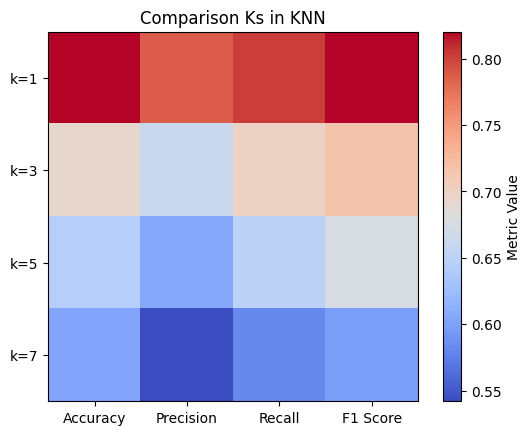

In [705]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for Model 1
model1_accuracy, model1_precision, model1_recall, model1_f1 = perform_bootstrap_classification(
    df_model_loucas_MI, KNeighborsClassifier(1))

# Metrics for Model 2
model2_accuracy, model2_precision, model2_recall, model2_f1 = perform_bootstrap_classification(
    df_model_loucas_MI, KNeighborsClassifier(3))

# Metrics for Model 3
model3_accuracy, model3_precision, model3_recall, model3_f1 = perform_bootstrap_classification(
    df_model_loucas_MI, KNeighborsClassifier(5))

# Metrics for Model 4
model4_accuracy, model4_precision, model4_recall, model4_f1 = perform_bootstrap_classification(
    df_model_loucas_MI, KNeighborsClassifier(7))
# Create a numpy array with the metrics
metrics = np.array([[model1_accuracy, model1_precision, model1_recall, model1_f1],
                    [model2_accuracy, model2_precision, model2_recall, model2_f1],
                    [model3_accuracy, model3_precision, model3_recall, model3_f1],
                    [model4_accuracy, model4_precision, model4_recall, model4_f1]])

# Define the models and metrics
models = ['k=1', 'k=3', 'k=5', 'k=7']
metric_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create the heatmap
plt.imshow(metrics, cmap='coolwarm')

# Set the tick labels
plt.xticks(np.arange(len(metric_labels)), metric_labels)
plt.yticks(np.arange(len(models)), models)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Metric Value')

# Add title
plt.title('Comparing Ks in KNN')

# Show the plot
plt.show()


In [706]:
# test#